In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.

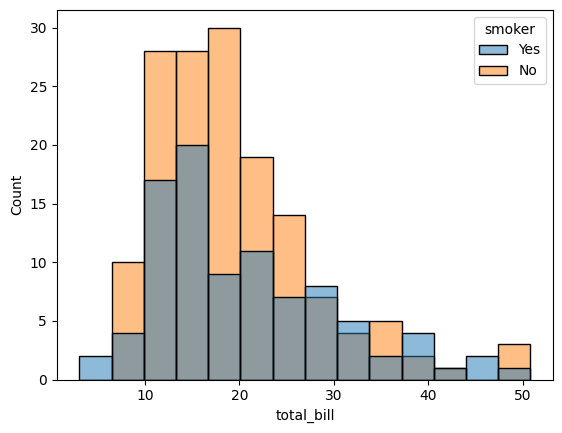

In [25]:
sns.histplot(data = tips, x = "total_bill", hue ="smoker", alpha = 0.5)
plt.show()

# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

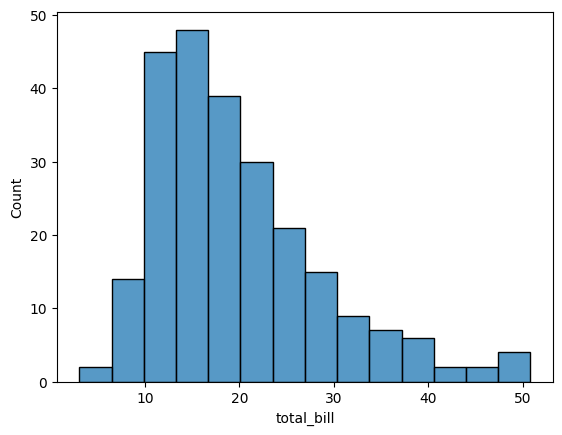

In [26]:
sns.histplot(data=tips, x="total_bill")
plt.show()

# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.


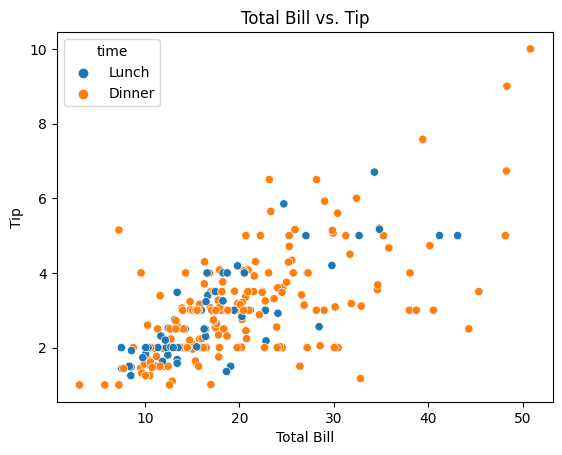

In [27]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.title("Total Bill vs. Tip")
 
plt.show()


# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

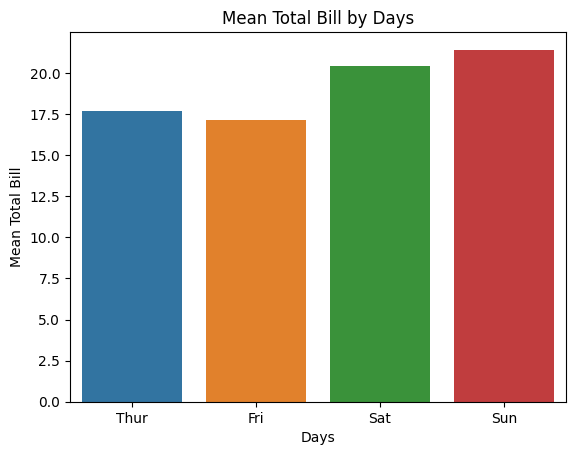

In [28]:
mean_total_bill = tips.groupby("day")["total_bill"].mean().reset_index()
sns.barplot(x = "day", y = "total_bill", data = mean_total_bill)
plt.xlabel("Days")
plt.ylabel("Mean Total Bill")
plt.title("Mean Total Bill by Days")
plt.show()

# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.

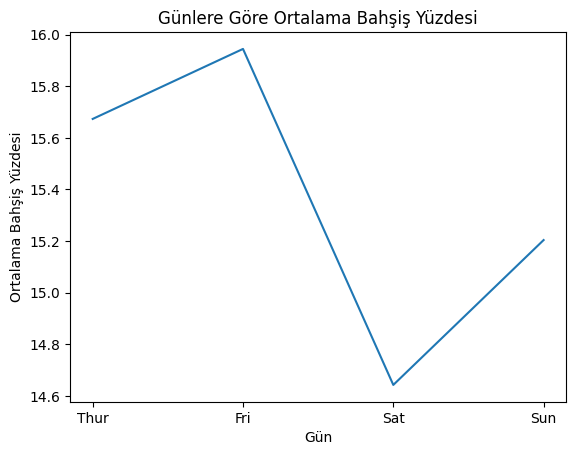

In [29]:
mean_tip = tips.groupby("day")["tip"].mean()
mean_total_bill = tips.groupby("day")["total_bill"].mean()

percent = (mean_tip / mean_total_bill) * 100

plt.plot(percent.index, percent.values)

plt.xlabel("Gün")
plt.ylabel("Ortalama Bahşiş Yüzdesi")
plt.title("Günlere Göre Ortalama Bahşiş Yüzdesi")

plt.show()


# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

<ipython-input-30-d4f0da4c2fe7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = tips.groupby("day")["total_bill","tip"].mean().reset_index()


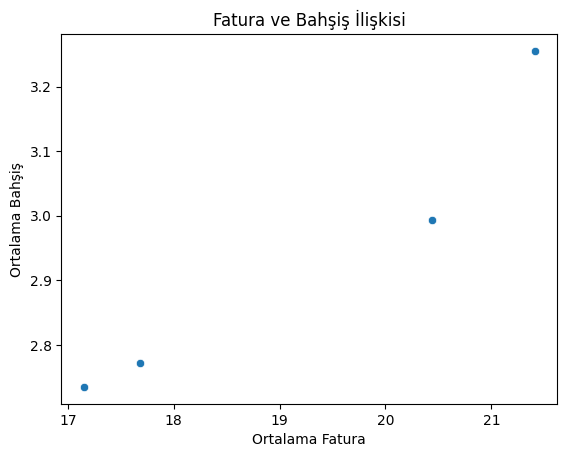

In [30]:
mean = tips.groupby("day")["total_bill","tip"].mean().reset_index()
mean_total_bill = tips.groupby("day")["total_bill"].mean()
mean_tip = tips.groupby("day")["tip"].mean()
sns.scatterplot(x=mean_total_bill, y=mean_tip)

plt.xlabel("Ortalama Fatura")
plt.ylabel("Ortalama Bahşiş")
plt.title("Fatura ve Bahşiş İlişkisi")

plt.show()

# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

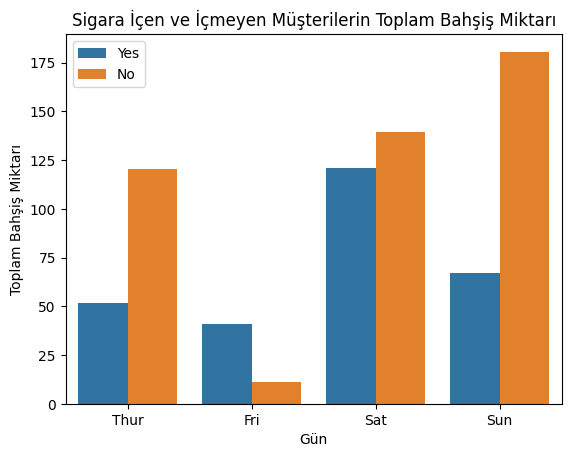

In [31]:
total_tip = tips.groupby(["day","smoker"])["tip"].sum().reset_index()
sns.barplot(x="day", y="tip", hue="smoker", data=total_tip)
plt.xlabel("Gün")
plt.ylabel("Toplam Bahşiş Miktarı")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Toplam Bahşiş Miktarı")
plt.legend()
plt.show()


# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

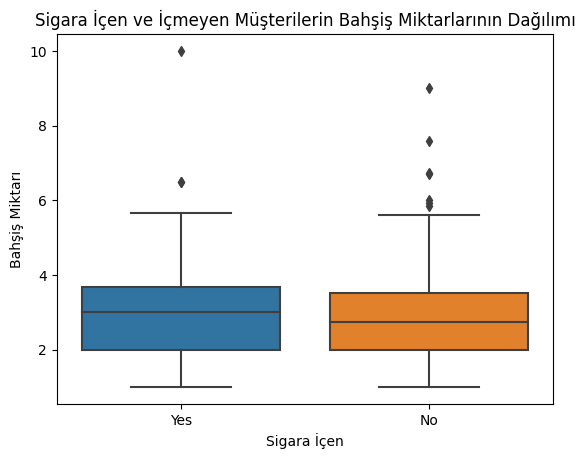

In [32]:
sns.boxplot(x="smoker", y="tip", data=tips)
plt.xlabel("Sigara İçen")
plt.ylabel("Bahşiş Miktarı")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarlarının Dağılımı")
plt.show()

# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.

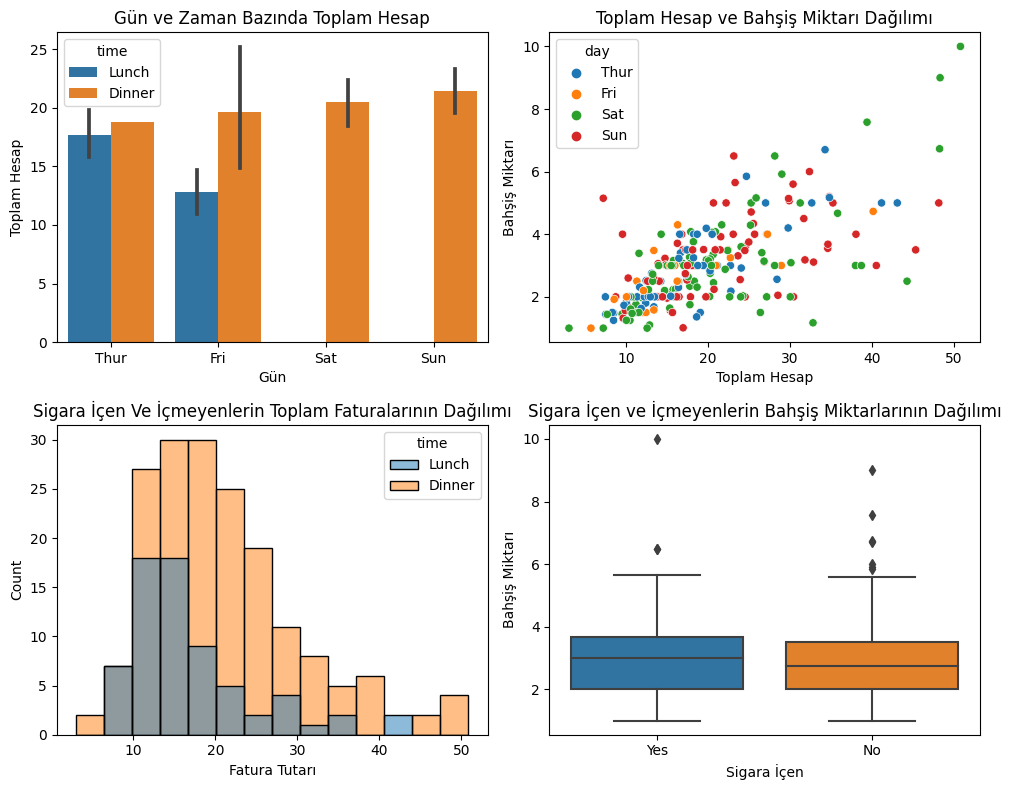

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(x="day", y="total_bill", hue="time", data=tips, ax=axes[0, 0])
axes[0, 0].set_xlabel("Gün")
axes[0, 0].set_ylabel("Toplam Hesap")
axes[0, 0].set_title("Gün ve Zaman Bazında Toplam Hesap")

sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[0, 1])
axes[0, 1].set_xlabel("Toplam Hesap")
axes[0, 1].set_ylabel("Bahşiş Miktarı")
axes[0, 1].set_title("Toplam Hesap ve Bahşiş Miktarı Dağılımı")

sns.histplot(data = tips, x = "total_bill", hue ="time", alpha = 0.5, ax=axes[1, 0]),
axes[1, 0].set_xlabel("Fatura Tutarı")
axes[1, 0].set_title("Sigara İçen Ve İçmeyenlerin Toplam Faturalarının Dağılımı")

sns.boxplot(x="smoker", y="tip", data=tips, ax=axes[1, 1])
axes[1, 1].set_xlabel("Sigara İçen")
axes[1, 1].set_ylabel("Bahşiş Miktarı")
axes[1, 1].set_title("Sigara İçen ve İçmeyenlerin Bahşiş Miktarlarının Dağılımı")

plt.tight_layout()
plt.show()
